In [1]:
from jax import numpy as np
from jax import random

In [2]:
key = random.PRNGKey(0)

Generate a mixture of Gaussians

In [3]:
# define mean and variances of two Gaussians
m1 = -5.0; s1 = 1.5
m2 = 2.0; s2 = 1.1
m3 = 7.0; s3 = 1.3

# also define the weights
w1 = 0.33 
w2 = 0.33
w3 = 1.0-w1-w2

# number of samples
n_samples = 10000

In [4]:
# Generate some sample data, with proportions given by w1, w2, w3
Effect = np.concatenate([m1 + s1*random.normal(key, (int(w1*n_samples),)), 
                    m2 + s2*random.normal(key, (int(w2*n_samples),)),
                    m3 + s3*random.normal(key, (int(w3*n_samples),))
                   ])

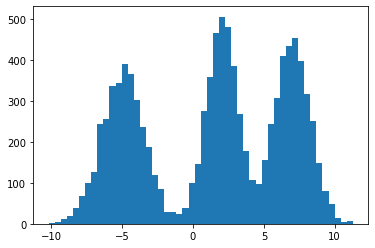

In [5]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(Effect, bins=50)
plt.show()

In [6]:
Effect.shape

(9999,)

In [7]:
# Sort the values and normalize them between 0 and 1

In [8]:
Effect = np.sort(Effect)
Effect-=np.min(Effect)
Effect/=np.max(Effect)

In [9]:
print(np.min(Effect))
print(np.max(Effect))

0.0
1.0


In [10]:
# Compute the empirical CDF

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF

In [12]:
ecdf = ECDF(Effect)

In [13]:
Cause = ecdf(Effect)

Make x-y plot, also showing the densities.

Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html

In [14]:
# import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Fixing random state for reproducibility
# np.random.seed(19680801)

# Cause in the x-axis, Effect in the y-axis
x = Cause
y = Effect

# Add Kernel Density Estimation for smoother densities on x and y
kde_x = stats.gaussian_kde(x)
kde_y = stats.gaussian_kde(y)

xx = np.linspace(0, 1, 1000)

In [15]:
import seaborn as sns
sns.set_style("white")
sns.axes_style("ticks")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': True,
 'ytick.left': True}

<ipython-input-16-fbd0c1a39326>:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('IGCI', dpi=None, facecolor='w', edgecolor='w',


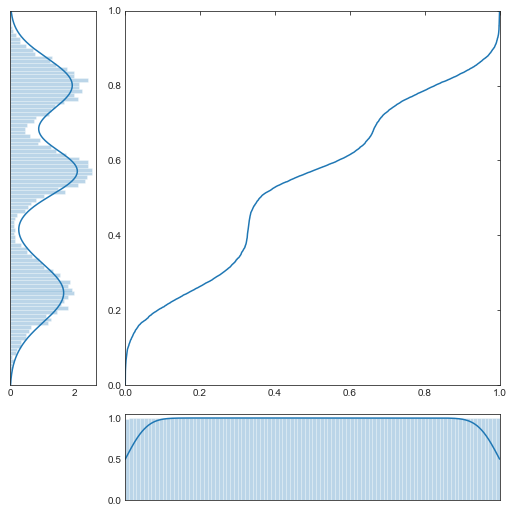

In [16]:
# definitions for the axes
left = 0.4
bottom = 0.4

# Width and height of the x-y plot
width, height = 0.65, 0.65

# Spacing between the axes of the x-y plot and the histograms:
spacing = 0.03


rect_scatter = [left, bottom, width, height]

# Distance from axes
distance = 0.17
# rect_histx = [left, bottom + height + spacing, width, 0.15]
# rect_histy = [left + width + spacing, bottom, 0.15, height]
rect_histx = [left, bottom - distance - spacing, width, 0.15]
rect_histy = [left - distance - spacing, bottom, 0.15, height]


# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
# ax_scatter.scatter(x, y)
ax_scatter.plot(x, y)

# now determine nice limits by hand:
binwidth = 0.01
lim = 1#np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((0, 1))
ax_scatter.set_ylim((0, 1))

bins = np.arange(0, 1+binwidth, binwidth)
ax_histx.hist(x, bins=bins, density=True, alpha=0.3)
# Add KDE plot of the density for x
ax_histx.plot(xx, kde_x(xx), color='C0')
ax_histy.hist(y, bins=bins, orientation='horizontal', density=True, alpha=0.3)
# Add KDE plot of the density for y
ax_histy.plot(kde_y(xx), xx, color='C0')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.savefig('IGCI', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=False, bbox_inches='tight', pad_inches=2.1,
            frameon=None, metadata=None)

plt.show()